In [56]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
from scipy.io import wavfile as wav
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

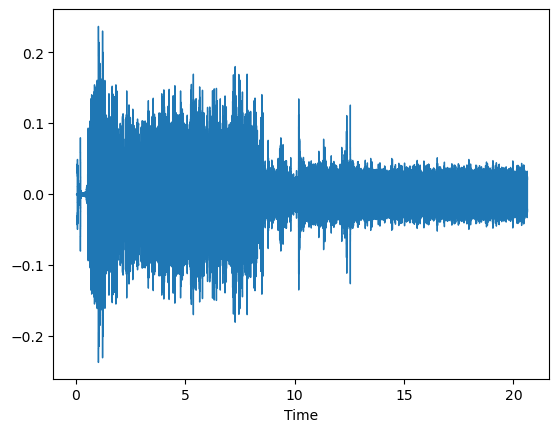

<Figure size 1400x500 with 0 Axes>

In [3]:
#ToiletFlush 
filename = "C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019/0d06ee8b.wav"
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
plt.figure(figsize=(14,5))
ipd.Audio(filename)

In [4]:
# defines how many times per seconds a sound is sampled
# The standard sample rate used for audio is 44.1 KHz(44,100 hertz)
sample_rate

22050

In [5]:
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate

44100

In [6]:
wave_audio

array([    0,     0,     0, ...,  -153,  -986, -1139], dtype=int16)

In [7]:
data

array([ 0.03036191,  0.07030924,  0.08388804, ..., -0.02785748,
       -0.01621416, -0.01373306], dtype=float32)

In [61]:
metadata = pd.read_csv("C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/metadata_v3.csv")
metadata

,File_Name,Folder_Name,Dataset,Event_Lable
0,#NAME?,target_Blender_DESED,DESED,Blender
1,k-2RZwDArWw_288_298.wav,target_Blender_DESED,DESED,Blender
2,L5jZgm0Xd2w_269_279.wav,target_Blender_DESED,DESED,Blender
3,ladKyOxydd4_251_261.wav,target_Blender_DESED,DESED,Blender
4,LU0ZWTmamKI_118_128.wav,target_Blender_DESED,DESED,Blender
...,...,...,...,...
515,5-207811-B-35.wav,target_washing_machine_ESC50,ESC50,washing_machine
516,5-223810-A-35.wav,target_washing_machine_ESC50,ESC50,washing_machine
517,5-238021-A-35.wav,target_washing_machine_ESC50,ESC50,washing_machine
518,5-245040-A-35.wav,target_washing_machine_ESC50,ESC50,washing_machine


In [62]:
# Check whether the dataset is imbalanced
metadata['Event_Lable'].value_counts()

Event_Lable
Blender                       40
brushing_teeth                40
clock_alarm                   40
coughing                      40
Electric_shaver_toothbrush    40
glass_breaking                40
laughing                      40
sneezing                      40
snoring                       40
Microwave_oven                40
Toilet_flush                  40
vacuum_cleaner                40
washing_machine               40
Name: count, dtype: int64

Exrtract Features

Mel- Frequency Cepstral Coefficinets (MFCC) from the audio samples. The MFCC summaries the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. Theses audio reresentaions will allow us to identify features for classification

In [13]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs.T, axis=0)
mfccs_scaled_features

array([-2.1506538e+02,  2.7050869e+00, -3.3044296e+01, -1.7954229e+01,
       -1.8908592e+01, -1.5245302e+01, -8.3297195e+00, -7.2931209e+00,
       -7.2458882e+00, -3.1702943e+00, -3.2528191e+00, -6.5538397e+00,
       -6.9055266e+00, -1.5978732e+00, -4.2501783e+00,  2.6991885e+00,
       -1.2930660e+00,  5.5491052e+00,  2.1175532e+00,  7.3601775e+00,
       -2.0006967e-01,  3.4783099e+00,  2.9504211e+00,  6.0970850e+00,
       -3.0488524e-01,  1.6685001e+00, -1.1501194e+00,  3.2973006e+00,
       -2.1450074e+00,  6.7997375e+00, -1.6727711e+00,  3.3959460e+00,
       -1.8401183e+00,  3.4691093e+00, -6.7546523e-01,  4.9472842e+00,
        3.6028755e-01,  2.1624997e+00,  3.9828667e-01,  2.5839410e+00],
      dtype=float32)

In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y= audio, sr = sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [20]:
def extract_audio_features(directory_path, file_extension='.wav', n_mfcc=40):
    """
    Extract audio features (MFCCs) from audio files in a directory with multiple folders.

    Parameters:
    - directory_path (str): The path to the main directory.
    - file_extension (str, optional): File extension of the audio files. Default is '.wav'.
    - n_mfcc (int, optional): Number of MFCCs to compute. Default is 40.

    Returns:
    - features (list): A list of feature vectors for each audio file.
    - file_paths (list): A list of corresponding file paths.
    """
    features = []
    file_paths = []

    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(file_extension):
                file_path = os.path.join(root, file)
                data, sample_rate = librosa.load(file_path)
                mfccs = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc = n_mfcc)
                mfccs_scaled_features = np.mean(mfccs.T, axis=0)
                features.append(mfccs_scaled_features)
                file_paths.append(file_path)

    return features, file_paths

# Example usage:
main_directory_path = 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent'
audio_features, file_paths = extract_audio_features(main_directory_path)

# Now 'audio_features' contains the feature vectors, and 'file_paths' contains corresponding file paths
for file_path, feature_vector in zip(file_paths, audio_features):
    print(f"File: {file_path}")
    # print(f"Feature Vector: {feature_vector}\n")


File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\-uQVTqZ1MAQ_35_45.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\2duVGulE6lo_81_91.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\2w96QJ7UvhQ_133_143.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\31etSiozBZ4_56_66.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\4B6Ch03-wjQ_415_425.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\64zwMCsqdeM_133_143.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\6sjz04nF7jQ_9_19.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\7QpEG3T0rJs_10_20.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\86ekc_OvaCI_192_202.wav
File: C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target

In [65]:
import os
import librosa

def list_audio_files(directory_path, allowed_extensions=['.wav', '.mp3']):
    audio_files = []

    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)

            # Check if the file is an audio file based on its extension
            _, file_extension = os.path.splitext(file_path)
            if file_extension.lower() in allowed_extensions:
                audio_files.append(file_path)

    return audio_files

# Example usage:
main_directory_path = 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent'
audio_files_list = list_audio_files(main_directory_path)

# Print the list of audio file paths
for audio_file in audio_files_list:
    print(audio_file)


C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\-uQVTqZ1MAQ_35_45.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\k-2RZwDArWw_288_298.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\L5jZgm0Xd2w_269_279.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\ladKyOxydd4_251_261.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\LU0ZWTmamKI_118_128.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\lv14REvqCxY_422_432.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\MB1Vmz4xasM_12_22.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\mozHRWzXjWo_223_233.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\mR1Bz7Vp_Zg_225_235.wav
C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\target_Blender_DESED\mrZ2ILPp1f8_57_67.wav
C:/Users/zaeries

In [66]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Feature extraction (MFCCs as an example)
def extract_features(audio_path):
    data, sample_rate = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs, axis=1)

# Step 2: Prepare feature vectors
audio_paths = audio_files_list
feature_vectors = [extract_features(path) for path in audio_paths]

# Step 3: Dimensionality reduction (Optional)
pca = PCA(n_components=10)
reduced_features = pca.fit_transform(feature_vectors)

# Step 4: Clustering
kmeans = KMeans(n_clusters=13)
cluster_labels = kmeans.fit_predict(reduced_features)

# Step 5: Evaluate clusters
# Listen to samples from each cluster to understand the types of events grouped together

# Step 6: Model Deployment
# Deploy the unsupervised model for classifying new audio events


c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [67]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(reduced_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.24250190231539845


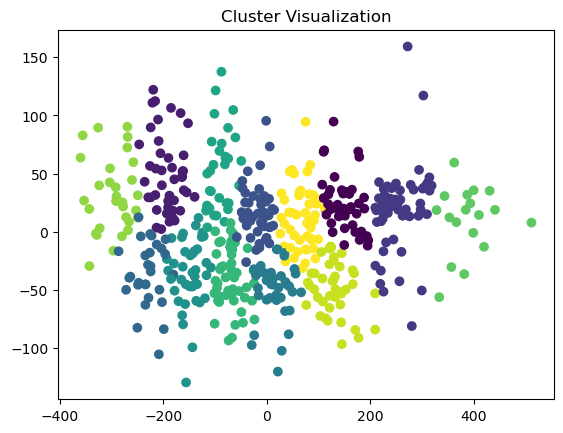

In [68]:
import matplotlib.pyplot as plt

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Cluster Visualization")
plt.show()


['C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\-uQVTqZ1MAQ_35_45.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\2duVGulE6lo_81_91.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\2w96QJ7UvhQ_133_143.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\31etSiozBZ4_56_66.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\4B6Ch03-wjQ_415_425.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\64zwMCsqdeM_133_143.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\6sjz04nF7jQ_9_19.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\7QpEG3T0rJs_10_20.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Blender_DESED\\86ekc_OvaCI_192_202.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent\\target_Bl

In [44]:
Toilet_flush_Kaggle2019_directory_path = 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019'
audio_files_list_Toilet_flush = list_audio_files(Toilet_flush_Kaggle2019_directory_path)
audio_files_list_Toilet_flush

['C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\03106a7c.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\07132e5a.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\07db9e55.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\0d06ee8b.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\10138a66.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\14c64597.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\156317f5.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\174d3f13.wav',
 'C:/Users/zaeriesfn/Desktop/Aging in Place/TargetEvent/target_train_Toilet_flush_Kaggle2019\\1e0a83aa.wav',
 'C:/Users/zaeriesf

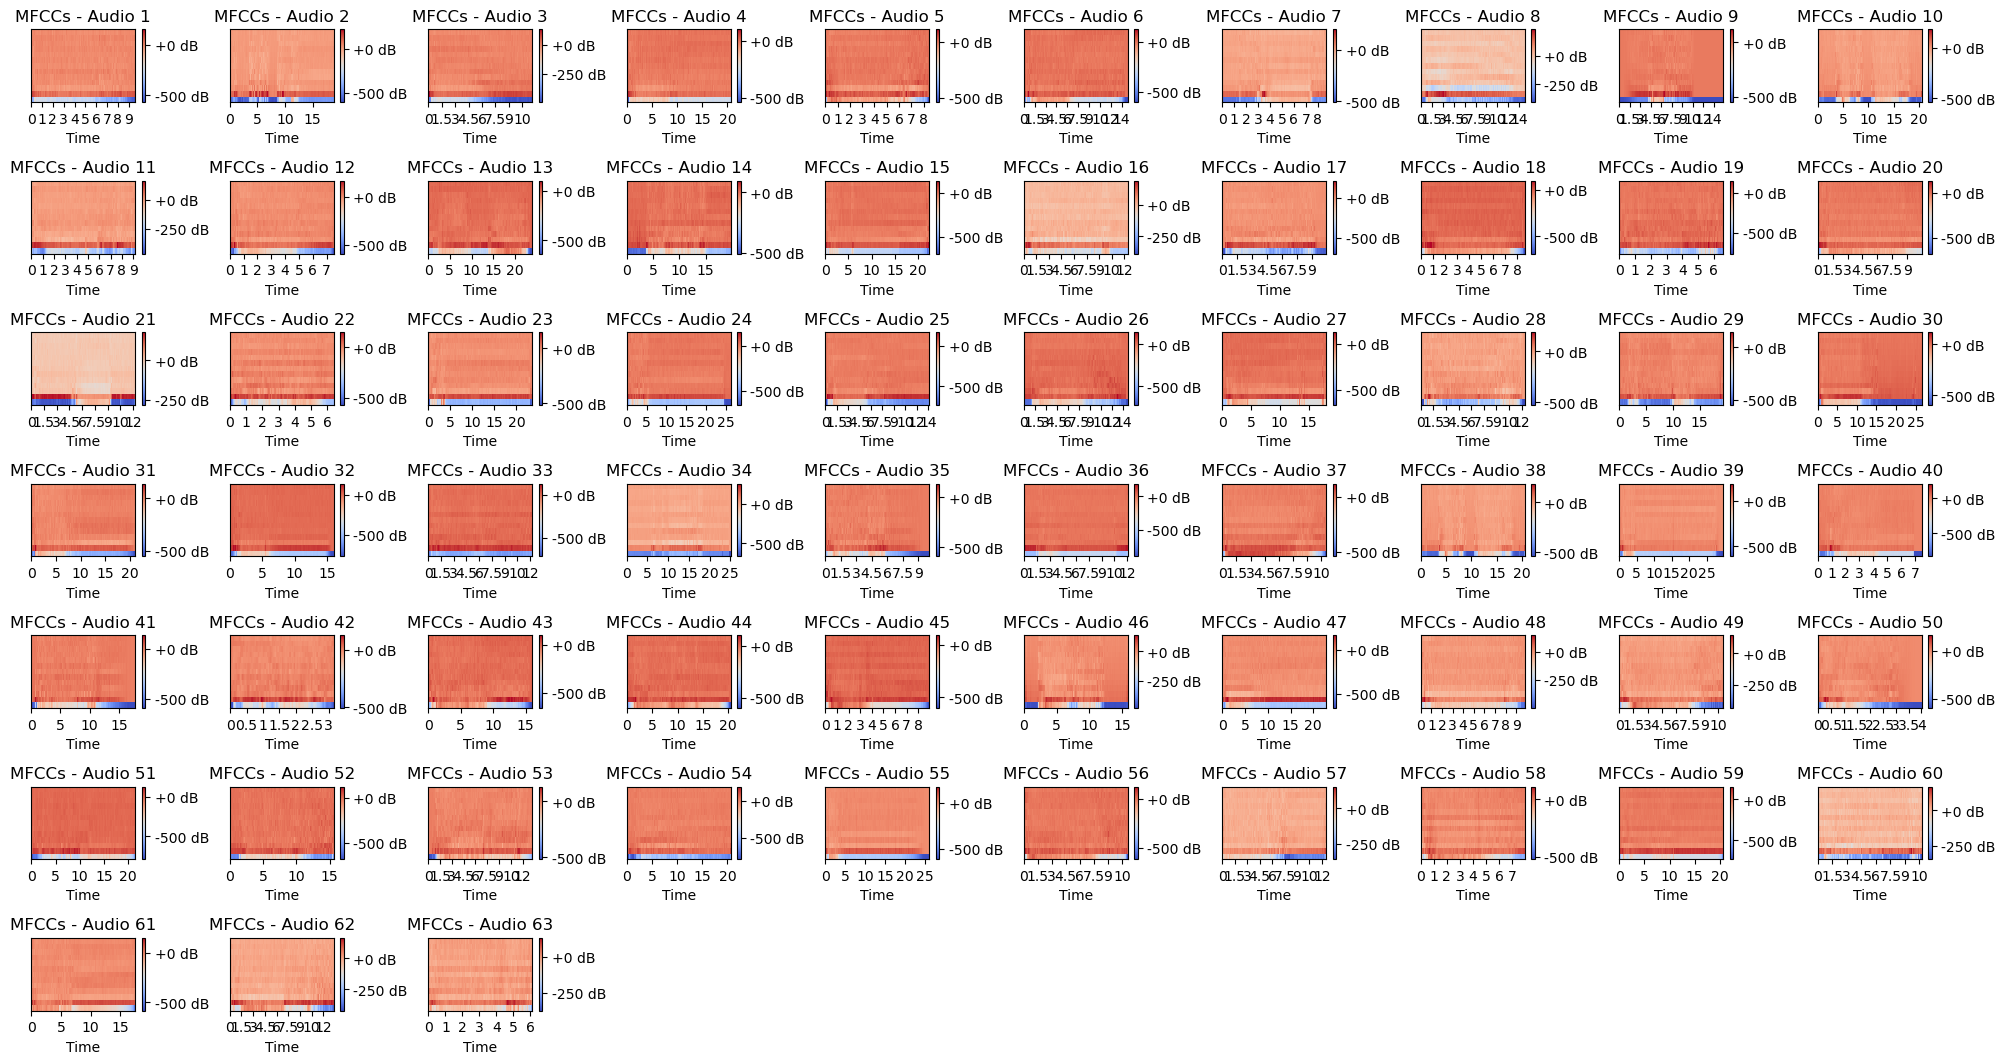

In [50]:
# Function to extract MFCC features
def extract_mfcc(audio_path, n_mfcc=13):
    data, sample_rate = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc)
    return mfccs

# List of paths to audio files (replace with your actual paths)
audio_files = audio_files_list_Toilet_flush  # Select the first 100 audio files

# Extract MFCC features for each audio file
mfccs_list = [extract_mfcc(audio_path) for audio_path in audio_files]

# Plotting the MFCCs as heatmaps
plt.figure(figsize=(20, 30))

for i, mfccs in enumerate(mfccs_list, 1):
    plt.subplot(20, 10, i)  # Adjust the layout based on the number of rows and columns you prefer
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCCs - Audio {i}')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

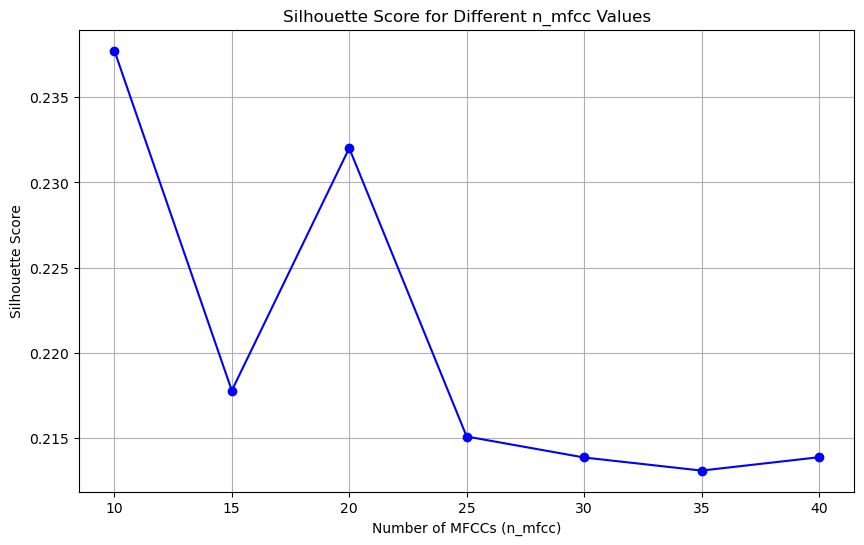

In [60]:
import matplotlib.pyplot as plt

# Function to extract MFCC features
def extract_features(audio_path, n_mfcc=40):
    data, sample_rate = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc)
    return np.mean(mfccs, axis=1)

# List of paths to audio files
audio_paths = audio_files_list

# Initialize lists to store n_mfcc values and corresponding Silhouette Scores
n_mfcc_values = list(range(10, 41, 5))  # Using a step size of 5
silhouette_scores = []

# Iterate over different values of n_mfcc
for n_mfcc_value in n_mfcc_values:
    # Step 2: Prepare feature vectors
    feature_vectors = [extract_features(path, n_mfcc=n_mfcc_value) for path in audio_paths]

    # Step 3: Dimensionality reduction (Optional)
    pca = PCA(n_components=10)
    reduced_features = pca.fit_transform(feature_vectors)

    # Step 4: Clustering
    kmeans = KMeans(n_clusters=14)
    cluster_labels = kmeans.fit_predict(reduced_features)
    # cluster_labels = kmeans.fit_predict(feature_vectors)


    # Step 5: Evaluate clusters using Silhouette Score
    silhouette_avg = silhouette_score(reduced_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the results in a line chart
plt.figure(figsize=(10, 6))
plt.plot(n_mfcc_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different n_mfcc Values')
plt.xlabel('Number of MFCCs (n_mfcc)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


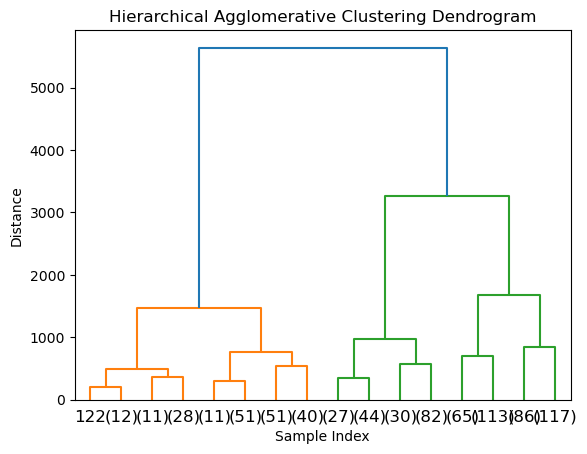

Results exported to 'hierarchical_clustering_results.xlsx'


In [57]:
# Step 1: Feature extraction (MFCCs as an example)
def extract_features(audio_path):
    data, sample_rate = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=20)
    return np.mean(mfccs, axis=1)

# Step 2: Prepare feature vectors
audio_paths = audio_files_list  # Replace with your actual paths
feature_vectors = [extract_features(path) for path in audio_paths]

# Step 3: Hierarchical Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=14, linkage='ward')  # Adjust the number of clusters as needed
cluster_labels = model.fit_predict(feature_vectors)

# Step 4: Dendrogram (Optional, for visualization)
linkage_matrix = linkage(feature_vectors, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=3)  # Adjust 'p' as needed
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Displaying the cluster assignments and exporting to Excel
result_data = {'Audio File': audio_paths, 'Cluster Label': cluster_labels}

# Create a DataFrame
df = pd.DataFrame(result_data)

# Export to Excel file
excel_file_path = 'hierarchical_clustering_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Results exported to '{excel_file_path}'")

In [58]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(feature_vectors, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1705661118030548


c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\zaeriesfn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

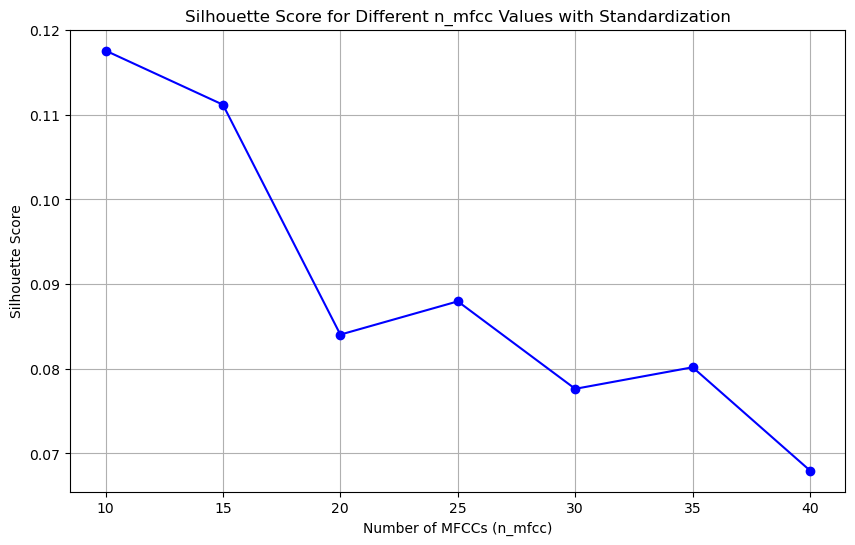

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Function to extract MFCC features
def extract_features(audio_path, n_mfcc=40):
    data, sample_rate = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=n_mfcc)
    return np.mean(mfccs, axis=1)

# List of paths to audio files
audio_paths = audio_files_list

# Initialize lists to store n_mfcc values and corresponding Silhouette Scores
n_mfcc_values = list(range(10, 41, 5))  # Using a step size of 5
silhouette_scores = []

# Iterate over different values of n_mfcc
for n_mfcc_value in n_mfcc_values:
    # Step 2: Prepare feature vectors
    feature_vectors = [extract_features(path, n_mfcc=n_mfcc_value) for path in audio_paths]

    # Step 2a: Standardization (Normalization)
    scaler = StandardScaler()  # You can also try MinMaxScaler()
    feature_vectors_standardized = scaler.fit_transform(feature_vectors)

    # Step 3: Clustering
    kmeans = KMeans(n_clusters=14)
    cluster_labels = kmeans.fit_predict(feature_vectors_standardized)

    # Step 4: Evaluate clusters using Silhouette Score
    silhouette_avg = silhouette_score(feature_vectors_standardized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the results in a line chart
plt.figure(figsize=(10, 6))
plt.plot(n_mfcc_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different n_mfcc Values with Standardization')
plt.xlabel('Number of MFCCs (n_mfcc)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()